# SSCx Dissemination.

We analyze circuits developed under the SSCx Dissemination project.


In [29]:
from collections import OrderedDict
from dmt.tk.plotting import Bars, LinePlot, Crosses
from dmt.data.observation import measurement
from dmt.tk.plotting.multi import MultiPlot
from neuro_dmt.models.bluebrain.circuit.geometry import Cuboid
from neuro_dmt.library.users.visood.sscx_dissemination.analyses import *

While using this notebook for development, we might need to reload the adapter:

In [2]:
sscxdiss = SSCxDisseminationCircuit()

In [3]:
sscxdiss.variations

bio0: Not Available
bio1: Not Available
bio2: Not Available
bio3: Not Available
bio4: Not Available
bio5: Not Available
biom: 'Bio_M/20191206'
mock: 'MOCK'

In [4]:
circuit_model = sscxdiss.circuit(sscxdiss.variations.mock)
adapter = sscxdiss.adapter

test develop mock circuit Logger                                                
DEBUGINFO@<2020-03-05 15:26:48>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	138
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 2
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-03-05 15:26:48>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	138
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 3
with number of excitatory mtypes: 1

test develop mock circuit Logger                                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-03-05 15:26:48>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 4
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-03-05 15:26:48>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 4
with number of excitatory mtypes: 1

test develop mock circuit Logger                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-03-05 15:26:48>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020-03-05 15:26:48>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                    

41it [00:00, 403.57it/s]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/builder.py Logger
DEBUGINFO@<2020-03-05 15:26:48>                                                 
Mock circuit builder: get_connectome(...)



82304it [03:00, 455.52it/s]


In [5]:
from neuro_dmt.models.bluebrain.circuit.adapter import adapter as ad
from importlib import reload
adapter = ad.BlueBrainCircuitAdapter()

 We will develop our analysis of the SSCx Dissemination circuits as a growing
 list of analyzed phenomena:

In [6]:
phenomenon = OrderedDict()

For each **DMT** analysis we will need to define an interface defining the
methods that the analysis uses to query a circuit model.
Instead of defining an interface for each analysis, we have collected all the
interface methods for composition and connectome analyses:

In [7]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
CompositionAdapterInterface = CompositionAnalysesSuite.AdapterInterface

We will need to parameterize our analysis:

In [8]:
spec = AnalysisParameterization()
spec.field_dict

{'morphologies_interneurons': ['BP',
  'BTC',
  'CHC',
  'DB',
  'LBC',
  'NBC',
  'MC',
  'SBC',
  'SSC'],
 'number_cortical_thickness_bins': 50,
 'path_reports': '/Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/notebooks/reports',
 'sample_size': 100,
 'size_roi': array([50., 50., 50.])}

To save reports, we will use a reporter.

In [9]:
from neuro_dmt.analysis.reporting import CheetahReporter
reporter = CheetahReporter(
    path_output_folder=os.path.join(
        spec.path_reports, "analyses"))

# Circuit Composition
Rat *Somatoseonsory Cortex* circuits are atlas based.
Four sub-regions of the SSCx were populated:ec

In [10]:
populated_regions =\
    adapter.get_brain_regions(circuit_model)
populated_regions

('S1HL', 'S1FL', 'S1Tr', 'S1Sh')

We will use parameters to measure composition phenomena:

In [27]:
def get_regions(adapter, model):
    """
    Get regions...
    """
    return pd.DataFrame(
        adapter.get_brain_regions(model),
        columns=["region"])

def get_layers(adapter, model):
    """..."""
    return pd.DataFrame(
        adapter.get_layers(model),
        columns=["layer"])
    
def get_regions_and_layers(adapter, model):
    """
    Get regions and layers for the model.
    """
    regions = adapter.get_brain_regions(model)
    layers = adapter.get_layers(model)
    return pd.DataFrame(
        [[region, layer] for region in regions for layer in layers],
        columns=["region", "layer"])

We can count the number of cells in each region.
We will use **DMT** to define and run analyses. 
A DMT analysis requires a method to measure the analyzed phenomenon.
We define such a method to count cells:

## SSCx Subregions

Four sub-regions of the SSCx were populated:

In [18]:
def measurement_region_volume(
        adapter, circuit_model,
        **query):
    """
    Volume of the region specified by `query`.
    """
    spatial_query = terminology.circuit.get_spatial_query(query)
    return adapter.get_spatial_volume(circuit_model, **spatial_query)
phenomenon["region_volume"] =\
    Phenomenon(
        "Region Volume",
        description="Volume of a brain-region.",
        group="Composition")
analysis_region_volumes =\
    BrainCircuitAnalysis(
        title="Region Volumes",
        phenomenon=phenomenon["region_volume"],
        introduction="""
        Volumes of the populated subregions and layers of SSCx are analyzed.
        """,
        methods="""
        Voxels were counted in each sub-region, layer were counted and 
        multiplied with voxel volume.
        """,
        AdapterInterface=CompositionAdapterInterface,
        measurement_parameters=Parameters(get_regions_and_layers),
        sample_measurement=measurement_region_volume,
        plotter=Bars(xvar="layer",
                     xlabel="Layer",
                     yvar="region_volume",
                     ylabel="Volume",
                     gvar="region"))

### Region Volumes

To get an idea about the relative sizes of layers and sub-regions, we analyze
the volume of each modulated sub-region, layer pair in the circuit.

100%|██████████| 480/480 [00:00<00:00, 1184.87it/s]


/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/analysis/reporting/__init__.py Logger
INFO@<2020-03-05 15:26:48>                                                      
Post report region_volume at
	 /Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/notebooks/reports/analyses/region_volume/20200305/154337

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/analysis/reporting/__init__.py Logger
ALERT@<2020-03-05 15:26:48>                                                     
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/analysis/reporting/__init__.py
	lineno: 	532
	code_context: 	['                    LOGGER.get_source_info(),\n']
	index: 0


                    Failed to generate HTML for the report:
                    <class 'NameMapper.NotFound'>
                    	cannot find 'title'
                    

/Users

'/Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/notebooks/reports/analyses/region_volume/20200305/154337'

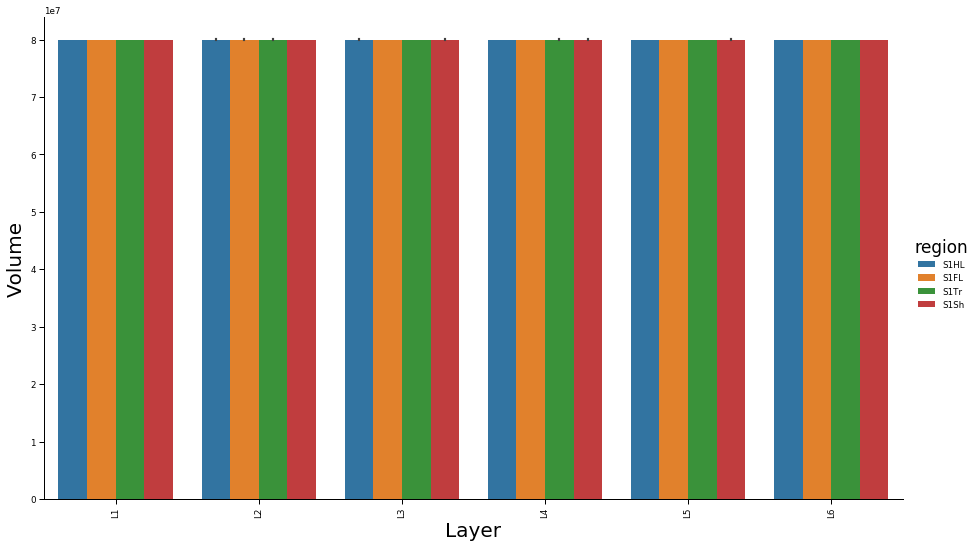

In [19]:
report_volumes = analysis_region_volumes(circuit_model, adapter)
reporter.post(report_volumes)

### Layer Thickness

Layer thickness is tricky to define for an atlas based circuit.
We expect that for a given sub-region a sample of layer thicknesses can be drawn.
Our next analysis uses this technique and plots the distribution of drawn samples
for each sub-region.

In [21]:
def measurement_thickness(
        adapter, circuit_model,
        region=None):
    """
    Measure layer thickness in the given region.
    """
    return adapter.get_thickness(circuit_model, region=region)

In [31]:
phenomenon["thickness"] =\
    Phenomenon(
        "Thickness",
        description="Thickness of layers.",
        group="Composition")

analysis_layer_thickness =\
    BrainCircuitAnalysis(
        phenomenon=phenomenon["thickness"],
        introduction="""
        Thickness of layers measured in each region modeled in the circuit.
        """,
        methods="""
        Thickness of layers were measured as the shortest top-bottom line
        passing through each voxel in the voxelized space.
        """,
        AdapterInterface=CompositionAdapterInterface,
        measurement_parameters=Parameters(get_regions),
        sample_measurement=measurement_thickness,
        measurement_collection=measurement.collection.series_type,
        sample_size=20,
        plotter=Bars(xvar="layer",
                     xlabel="Layer",
                     yvar="thickness",
                     ylabel="Thickness",
                     gvar="region"),
        report=CircuitAnalysisReport)

## Cell Distribution

In this section we study the distribution of cells over the physical geometry
of the circuit.


In [40]:
def random_position(
        adapter, circuit_model,
        **query):
    """
    Random position in circuit region specified by `query`.
    """
    spatial_query = terminology.circuit.get_spatial_query(query)
    return adapter.random_position(circuit_model, **spatial_query)
    
def random_box(
        adapter, circuit_model, 
        size_roi=100., **query):
    """
    Random cuboid in circuit region specified by `query`.
    """
    position = random_position(adapter, circuit_model, **query)
    return Cuboid(position - size_roi, position + size_roi)\
        if position is not None else None

def measurement_cell_count_using_sampling(
        adapter, circuit_model,
        size_roi=100., **query):
    """
    Measure the number of cells in a spatial location specified by the query.
    """
    box = random_box(adapter, circuit_model, size_roi=size_roi, **query)
    return adapter.get_cells(circuit_model, roi=box).shape[0]\
        if box is not None else 0.

### Cell Count

Circuit regions and layers are not the same size, and contain different densities
of cells.

In [44]:
phenomenon["cell_count"] =\
    Phenomenon("Cell Count", 
               description="Number of cells in the circuit.",
               group="Composition")
    
analysis_cell_count =\
    BrainCircuitAnalysis(
        phenomenon=phenomenon["cell_count"],
        introduction="""
        Number of cells in each of the populated sub-regions are analyzed.
        """,
        methods="""
        Cells were counted in randomly sampled cubic boxes of side $size_roi.
        Each sampled box was conditioned to lie in the spatial location 
        specified by brain-region and layer queried. For each spatial query,
        the measured sample contained $sample_size boxes.
        """,
        AdapterInterface=CompositionAdapterInterface,
        measurement_parameters=Parameters(get_regions_and_layers),
        sample_measurement=measurement_cell_count_using_sampling,
        sample_size=20,
        plotter=MultiPlot(mvar="region",
                          plotter=Bars(xvar="layer",
                                       xlabel="Layer",
                                       yvar="cell_count",
                                       ylabel="Cell Count")),
        report=CircuitAnalysisReport)
                                       




  0%|          | 0/480 [00:00<?, ?it/s]


  1%|          | 5/480 [00:00<00:09, 49.54it/s]


  3%|▎         | 13/480 [00:00<00:08, 55.04it/s]


  5%|▍         | 23/480 [00:00<00:07, 62.80it/s]


  6%|▋         | 31/480 [00:00<00:06, 67.03it/s]


  8%|▊         | 39/480 [00:00<00:06, 70.32it/s]


 10%|▉         | 46/480 [00:00<00:06, 68.74it/s]


 12%|█▏        | 56/480 [00:00<00:05, 74.68it/s]


 13%|█▎        | 64/480 [00:00<00:05, 75.57it/s]


 15%|█▌        | 73/480 [00:00<00:05, 76.73it/s]


 17%|█▋        | 81/480 [00:01<00:05, 75.86it/s]


 19%|█▉        | 90/480 [00:01<00:04, 79.20it/s]


 20%|██        | 98/480 [00:01<00:04, 79.21it/s]


 22%|██▏       | 106/480 [00:01<00:04, 78.07it/s]


 24%|██▍       | 114/480 [00:01<00:04, 78.56it/s]


 25%|██▌       | 122/480 [00:01<00:04, 78.85it/s]


 28%|██▊       | 132/480 [00:01<00:04, 82.46it/s]


 30%|██▉       | 142/480 [00:01<00:03, 84.62it/s]


 32%|███▏      | 152/480 [00:01<00:03, 87.17it/s]


 34%|███▎      | 161/480 [00:01<

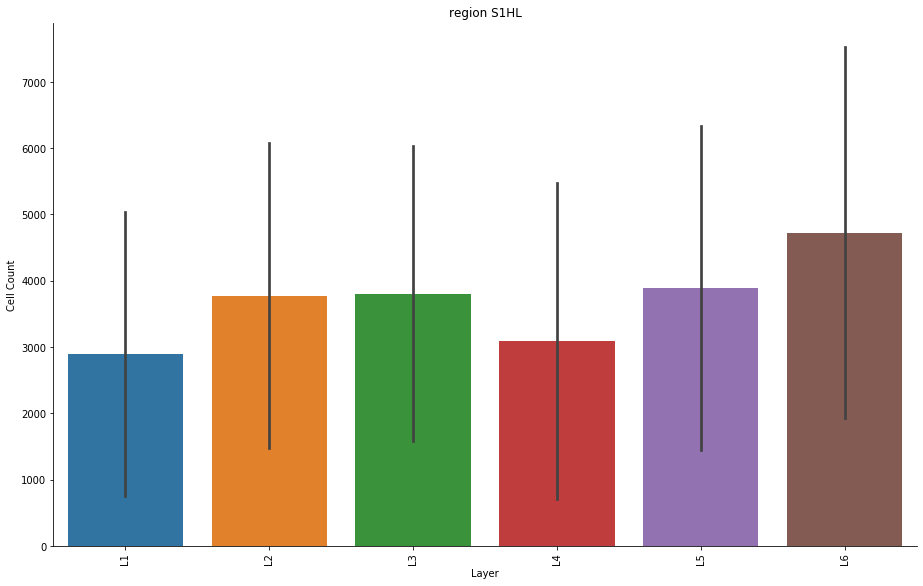

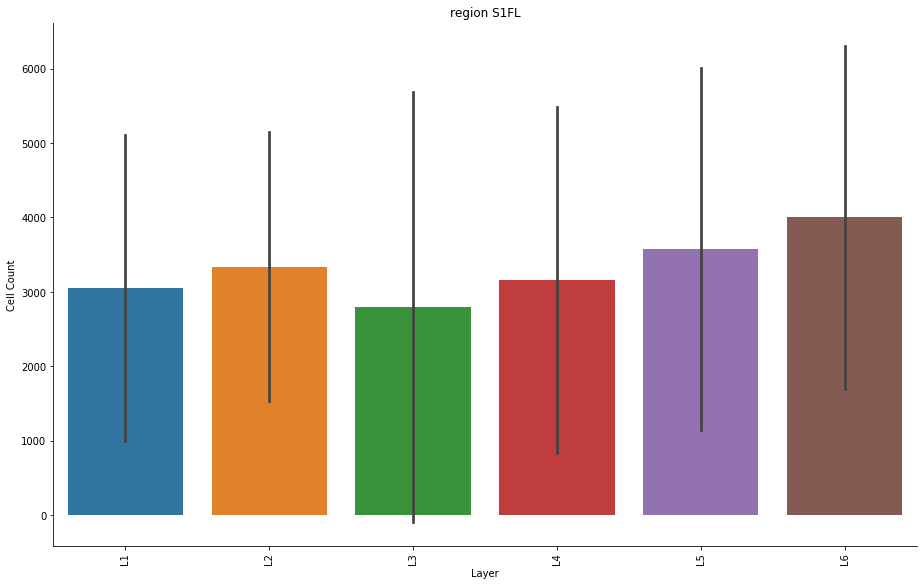

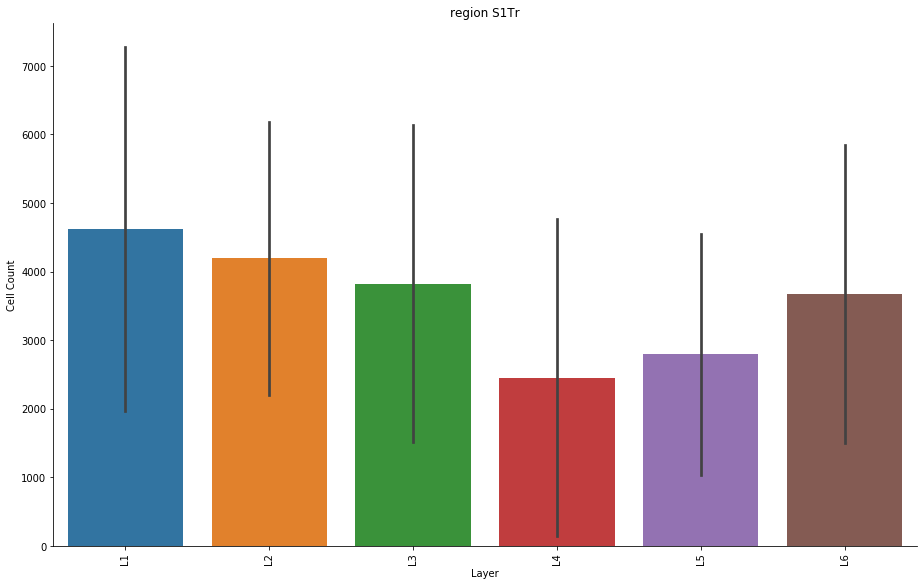

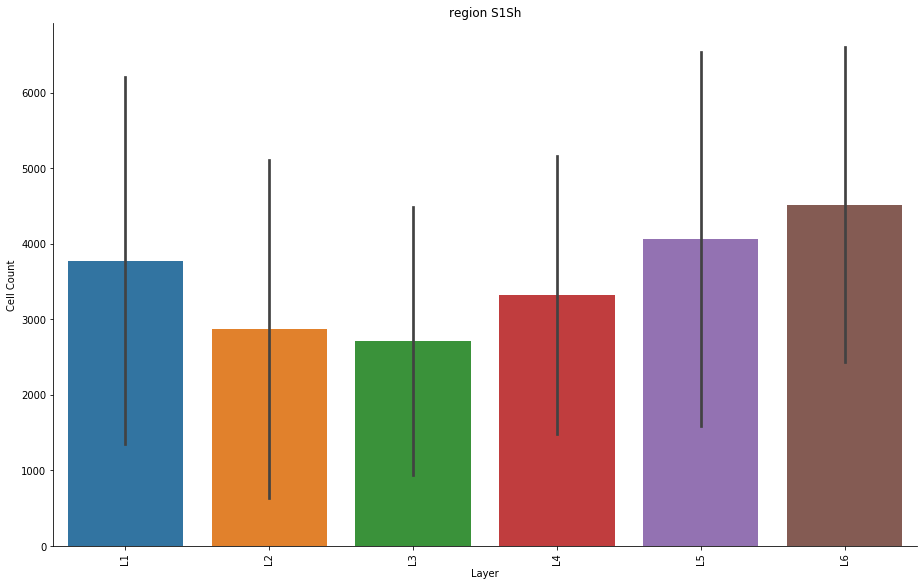

In [45]:
report_cell_count =\
    analysis_cell_count(circuit_model, adapter)

In [50]:
reporter.post(report_cell_count)

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/analysis/reporting/__init__.py Logger
INFO@<2020-03-05 12:29:15>                                                      
Post report cell_count at
	 /Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/notebooks/reports/analyses/cell_count/20200305/140738



'/Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/notebooks/reports/analyses/cell_count/20200305/140738'

### Cell Density

The number of cells in an volume specified by a region and layer is determined 
by the size of volume.
We can take out the volume by analyzing cell densities.

In [56]:
def measurement_cell_density_using_sampling(
        adapter, circuit_model,
        size_roi=100., **query):
    """
    Measure the density of cells in a spatial location specified by the query.
    """
    box = random_box(adapter, circuit_model, size_roi=size_roi, **query)
    
    if box is None:
        return 0.
    count_cells = adapter.get_cells(circuit_model, roi=box).shape[0]
    volume_spatial = box.volume
    return count_cells / volume_spatial

In [57]:
phenomenon["cell_density"] =\
    Phenomenon("Cell Density", 
               description="Number of cells in a unit volume.",
               group="Composition")
    
analysis_cell_density =\
    BrainCircuitAnalysis(
        phenomenon=phenomenon["cell_density"],
        introduction="""
        Density of cells in each of the populated sub-regions are analyzed.
        """,
        methods="""
        Cells were counted in randomly sampled cubic boxes of side $size_roi.
        Each sampled box was conditioned to lie in the spatial location 
        specified by brain-region and layer queried. For each spatial query,
        the measured sample contained $sample_size boxes.
        """,
        AdapterInterface=CompositionAdapterInterface,
        measurement_parameters=Parameters(get_regions_and_layers),
        sample_measurement=measurement_cell_density_using_sampling,
        sample_size=20,
        plotter=MultiPlot(mvar="region",
                          plotter=Bars(xvar="layer",
                                       xlabel="Layer",
                                       yvar="cell_density",
                                       ylabel="Cell Density")),
        report=CircuitAnalysisReport)





  0%|          | 0/480 [00:00<?, ?it/s]



  1%|▏         | 6/480 [00:00<00:07, 59.47it/s]



  3%|▎         | 13/480 [00:00<00:07, 62.16it/s]



  4%|▍         | 21/480 [00:00<00:06, 66.32it/s]



  6%|▌         | 27/480 [00:00<00:07, 63.19it/s]



  8%|▊         | 36/480 [00:00<00:06, 69.17it/s]



  9%|▉         | 45/480 [00:00<00:05, 74.10it/s]



 11%|█         | 53/480 [00:00<00:05, 75.10it/s]



 13%|█▎        | 62/480 [00:00<00:05, 78.87it/s]



 15%|█▌        | 72/480 [00:00<00:04, 82.59it/s]



 17%|█▋        | 82/480 [00:01<00:04, 85.61it/s]



 19%|█▉        | 91/480 [00:01<00:04, 86.72it/s]



 21%|██        | 100/480 [00:01<00:04, 85.40it/s]



 23%|██▎       | 109/480 [00:01<00:04, 85.04it/s]



 25%|██▍       | 119/480 [00:01<00:04, 87.25it/s]



 27%|██▋       | 128/480 [00:01<00:04, 87.90it/s]



 29%|██▊       | 137/480 [00:01<00:03, 86.25it/s]



 31%|███       | 147/480 [00:01<00:03, 88.42it/s]



 32%|███▎      | 156/480 [00:01<00:03, 83.99it/s]



 35%|███▍  

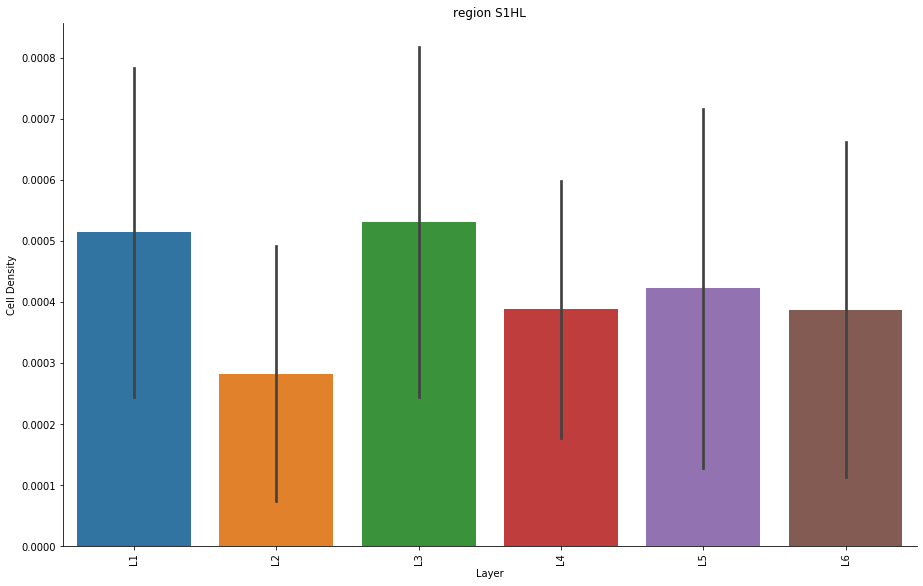

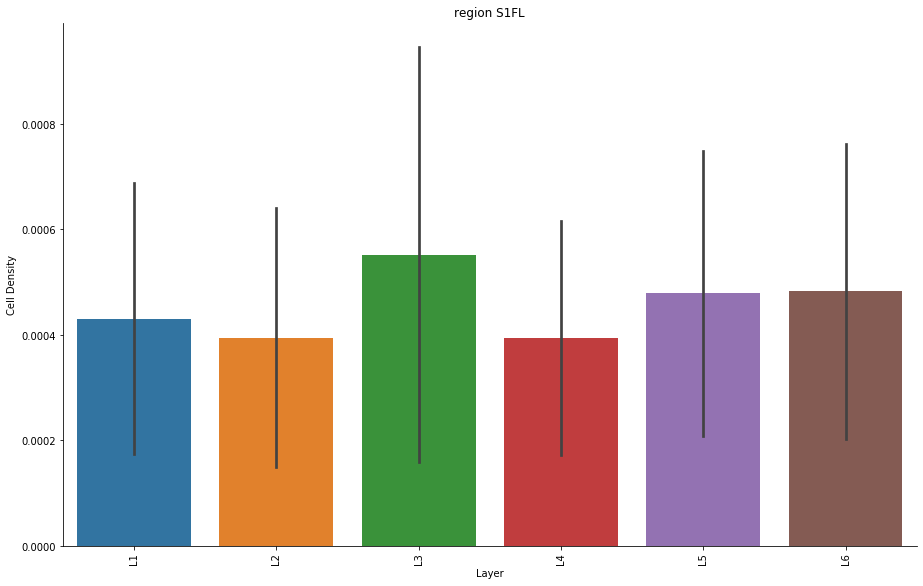

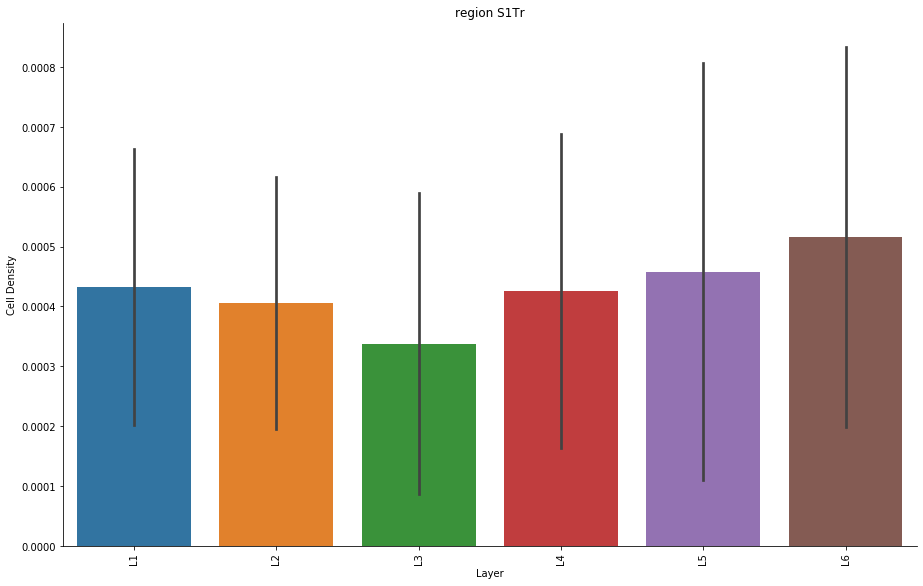

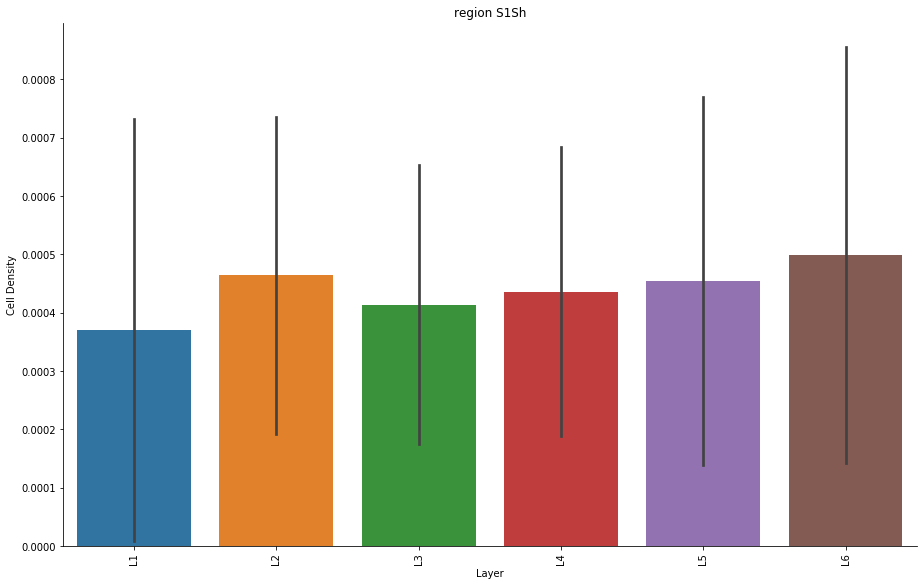

In [58]:
report_cell_density = analysis_cell_density(circuit_model, adapter)

In [59]:
reporter.post(report_cell_density)

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/analysis/reporting/__init__.py Logger
INFO@<2020-03-05 12:29:15>                                                      
Post report cell_density at
	 /Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/notebooks/reports/analyses/cell_density/20200305/144025



'/Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/notebooks/reports/analyses/cell_density/20200305/144025'